Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [4]:

print("\nDescription of variables:")
print(data.describe(include='all'))

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Description of variables:
        CustomerID  Gender         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   
25%      50.750000     NaN   28.750000           41.500000   
50%     100.500000     NaN   36.000000           61.500000   
75%     150.250000     NaN   49.000000           78.000000   
max     200.000000     NaN   70.000000          137.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top          

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [5]:

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Si los datos no están normalizados, las variables con valores numéricamente más grandes dominarán el cálculo de la distancia, lo que puede distorsionar el agrupamiento.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


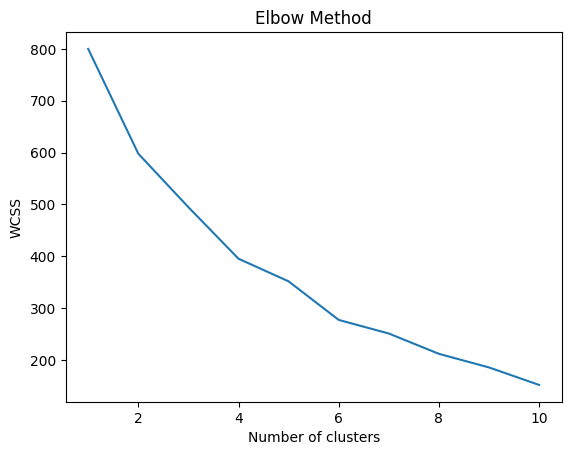

In [6]:


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

El "codo" se forma en K = 5, por lo tanto, lo más apropiado sería usar 5 clusters


Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [8]:

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

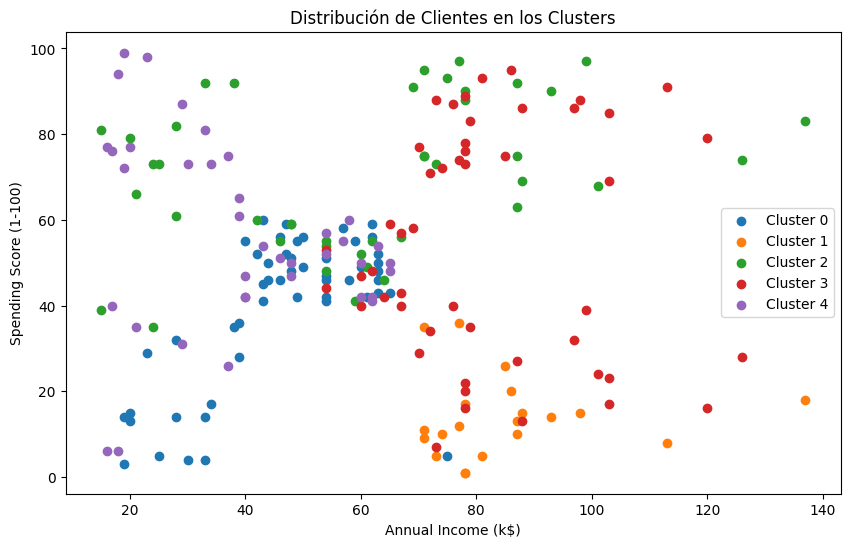

,Gender,Age,Annual Income (k$),Spending Score (1-100),CustomerID
Cluster,,,,,
0,0.490196,56.470588,46.098039,39.313725,51
1,0.000000,39.500000,85.150000,14.050000,20
2,0.000000,28.690476,60.904762,70.238095,42
3,1.000000,37.897959,82.122449,54.448980,49
4,1.000000,27.315789,38.842105,56.210526,38


In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {i}')

plt.title('Distribución de Clientes en los Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

cluster_summary = data.groupby('Cluster').agg({
    'Gender': 'mean',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID':'count'
})
cluster_summary


Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [10]:


cluster_summary = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

cluster_summary


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.470588,46.098039,39.313725
1,39.500000,85.150000,14.050000
2,28.690476,60.904762,70.238095
3,37.897959,82.122449,54.448980
4,27.315789,38.842105,56.210526


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Edad: El cluster 0 tiene el grupo de mayor edad; los clusters 2 y 4 agrupan a los más jóvenes.

Ingreso: Clusters 1 y 3 tienen los ingresos más altos; el cluster 4, los más bajos.

Gasto: Cluster 2 destaca por su alto gasto pese a ingresos medios; cluster 1 es el más conservador en el gasto a pesar de tener altos ingresos.



Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

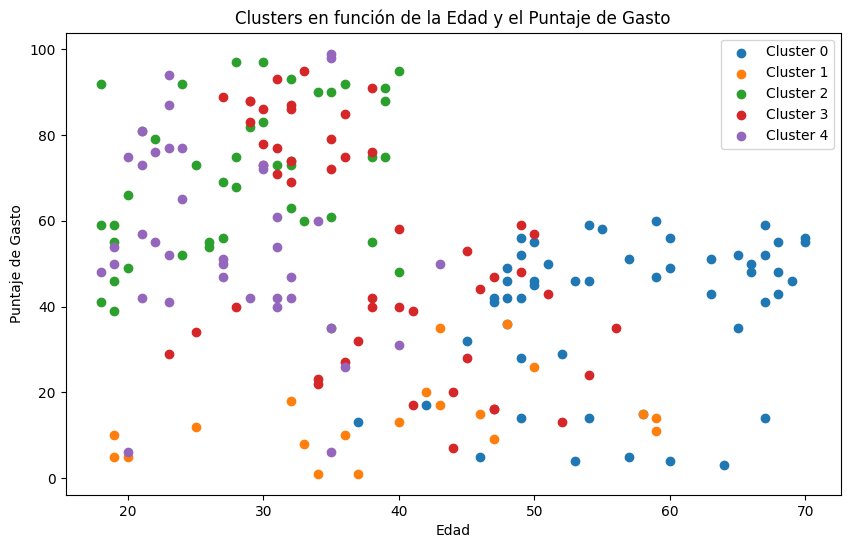

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'], label=f'Cluster {i}')

plt.title('Clusters en función de la Edad y el Puntaje de Gasto')
plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto')
plt.legend()
plt.show()


Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

se pueden identificar patrones bien definidos entre los diferentes clusters. Los clientes están razonablemente bien separados en grupos, especialmente los clusters 0 (personas mayores con gasto moderado), 1 (clientes con bajo gasto), y 2 (jóvenes con alto gasto), que ocupan regiones claras del gráfico. Algunos solapamientos ocurren entre los clusters 3 y 4, pero en general los grupos reflejan comportamientos distintos en cuanto a edad y nivel de gasto, lo que valida la segmentación realizada mediante K-means.


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

Adultos mayores con gasto moderado es el Clúster 0.
 Los  clientes mayores ( edad promedio de 56,5 años), con ingresos medios ( 46.100) y un nivel de pago intermedio   representan un grupo estable que puede ser más frugal en sus hábitos de consumo .

 Profesionales de alto ingreso y bajo consumo es el Clúster 1.
 Adultos de mediana edad (39,5 años), con los ingresos más altos (85.100) y los gastos más bajos (14,1).   Pueden ser personas adineradas sin un interés real en bienes de consumo frecuente .

 Jóvenes gastadores
 con  ingresos  medios  es  el  Clúster  2.  Grupo  joven (28,7 años ), con   ingresos  medios  (60.900)  y  un alto  porcentaje  de  gasto  (70,2).  Representa a consumidores activos , probablemente impulsivos o con un alto interés en experiencias o bienes de consumo rápido .

 ingresos (82,1k) y gastos elevados (54,4). Los clientes tienen un buen poder adquisitivo y están dispuestos a pagar, lo que probablemente los convierte en el mercado objetivo perfecto para las marcas de lujo .

 Los clientes son jóvenes (27,3 años ), tienen ingresos más bajos ingresos(38,8k), pero gastan significativamente más de lo previsto (56,2).(38,8k), pero gastan significativamente más de lo previsto (56,2). Ser utilizado por estudiantes o jóvenes profesionales con preferencias de consumo aspiracionales .

